In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_b = pd.read_csv("../data/Luma-Meta-Apr-1-2024-to-Jun-30-2024.csv")
df_a = pd.read_csv("../data/Luma-Meta-Jan-1-2024-to-Mar-31-2024.csv")
df_concatenated = pd.concat([df_a, df_b]).iloc[:, :-2]

start_date = "2024-01-01"
end_date = "2024-06-30"

df_concatenated.head()


,Ads,Age,Gender,Day,Reach,Impressions,Frequency,Currency,Amount spent (USD),Attribution setting,...,Adds to cart,Cost per add to cart,Adds to wishlist,Cost per add to wishlist,Content views,Cost per content view,Content views conversion value,Purchases,Cost per purchase,Purchases conversion value
0,NaN,NaN,NaN,NaN,1731306.0,10446713.0,6.034007,USD,211956.71,NaN,...,3181.0,66.6321,60.0,3532.611833,24123.0,8.786499,845601.17,2285.0,92.760048,216183.97
1,Nattokinase Listing - Static - PDP;...and 6 mo...,45-54,male,2024-03-31,NaN,NaN,NaN,USD,NaN,7-day click,...,NaN,NaN,NaN,NaN,1.0,NaN,29.99,NaN,NaN,NaN
2,Nattokinase Listing - Static - PDP;...and 6 mo...,55-64,female,2024-03-31,NaN,NaN,NaN,USD,NaN,7-day click,...,NaN,NaN,NaN,NaN,1.0,NaN,29.99,NaN,NaN,NaN
3,Nattokinase Animation - Vid - PDP;...and 5 mor...,25-34,female,2024-03-31,1.0,1.0,1.000000,USD,0.02,7-day click,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nattokinase Animation - Vid - PDP;...and 5 mor...,35-44,female,2024-03-31,4.0,13.0,3.250000,USD,0.59,7-day click,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_concatenated.describe()

,Reach,Impressions,Frequency,Amount spent (USD),Clicks (all),CPC (all),CTR (all),Gross impressions (includes invalid impressions from non-human traffic),"CPM (cost per 1,000 impressions)",Page engagement,...,Adds to cart,Cost per add to cart,Adds to wishlist,Cost per add to wishlist,Content views,Cost per content view,Content views conversion value,Purchases,Cost per purchase,Purchases conversion value
count,4.069500e+04,4.087000e+04,40695.000000,39137.000000,16305.000000,16277.000000,16305.000000,4.087300e+04,39137.000000,16869.000000,...,1916.000000,1885.000000,3.000000,2.000000,6127.000000,5981.000000,6126.000000,1621.000000,1593.000000,1621.000000
mean,2.076002e+02,6.971668e+02,1.419222,17.470588,44.989696,1.407003,4.486943,7.060414e+02,25.099246,82.122473,...,6.905532,18.301328,22.333333,26136.345917,10.366574,8.028566,419.872800,4.266502,27.672165,412.521061
std,1.129197e+04,7.341738e+04,0.588944,1825.665295,3288.763655,1.393753,10.121683,7.417999e+04,38.039212,6163.894685,...,157.139634,20.768671,32.715949,31966.507301,380.964256,12.488132,15391.444738,86.016202,28.124136,8496.916823
min,1.000000e+00,1.000000e+00,1.000000,0.009388,1.000000,0.003333,0.089686,1.000000e+00,0.137931,1.000000,...,1.000000,0.009998,1.000000,3532.611833,1.000000,0.005000,19.990000,1.000000,0.019995,16.000000
25%,3.000000e+00,5.000000e+00,1.045455,0.099899,1.000000,0.514260,1.204819,5.000000e+00,12.141898,1.000000,...,1.000000,4.480000,3.500000,14834.478875,1.000000,1.527379,39.990000,1.000000,8.910000,44.940000
50%,1.500000e+01,2.000000e+01,1.295812,0.469943,3.000000,1.014210,2.173913,2.000000e+01,19.000000,3.000000,...,2.000000,12.026114,6.000000,26136.345917,2.000000,3.530000,79.980000,1.000000,19.485961,99.960000
75%,8.600000e+01,1.230000e+02,1.556112,2.666988,9.000000,1.860000,4.026846,1.250000e+02,28.333333,8.000000,...,2.000000,25.180000,33.000000,37438.212958,4.000000,8.670000,149.960000,1.000000,36.962188,147.190000
max,1.731306e+06,1.054345e+07,23.000000,292440.480000,314111.000000,21.857734,300.000000,1.061031e+07,2910.000000,674092.000000,...,6103.000000,205.471911,60.000000,48740.080000,24123.000000,175.810000,858265.800000,2606.000000,240.007530,265455.210000


In [6]:
data = df_concatenated.iloc[:, 1:]
summary_dict = {'cols':data.columns,'unique':[],"count":[],"sum":[]}

for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:  # Check if the column is numerical
        summary_dict["sum"].append(data[col].sum())
    else:
        summary_dict["sum"].append(np.nan)
        
    summary_dict['unique'].append(data[col].nunique())
    summary_dict['count'].append(data[col].count())

summary_df = pd.DataFrame.from_dict(summary_dict)
summary_df 

,cols,unique,count,sum
0,Age,7,41024,NaN
1,Gender,3,41024,NaN
2,Day,182,41024,NaN
3,Reach,1698,40695,8.448292e+06
4,Impressions,2163,40870,2.849321e+07
5,Frequency,9367,40695,5.775525e+04
6,Currency,1,41026,NaN
7,Amount spent (USD),17820,39137,6.837464e+05
8,Attribution setting,1,41024,NaN
9,Clicks (all),161,16305,7.335570e+05


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41026 entries, 0 to 19491
Data columns (total 43 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Age                                                                      41024 non-null  object 
 1   Gender                                                                   41024 non-null  object 
 2   Day                                                                      41024 non-null  object 
 3   Reach                                                                    40695 non-null  float64
 4   Impressions                                                              40870 non-null  float64
 5   Frequency                                                                40695 non-null  float64
 6   Currency                                                                 41

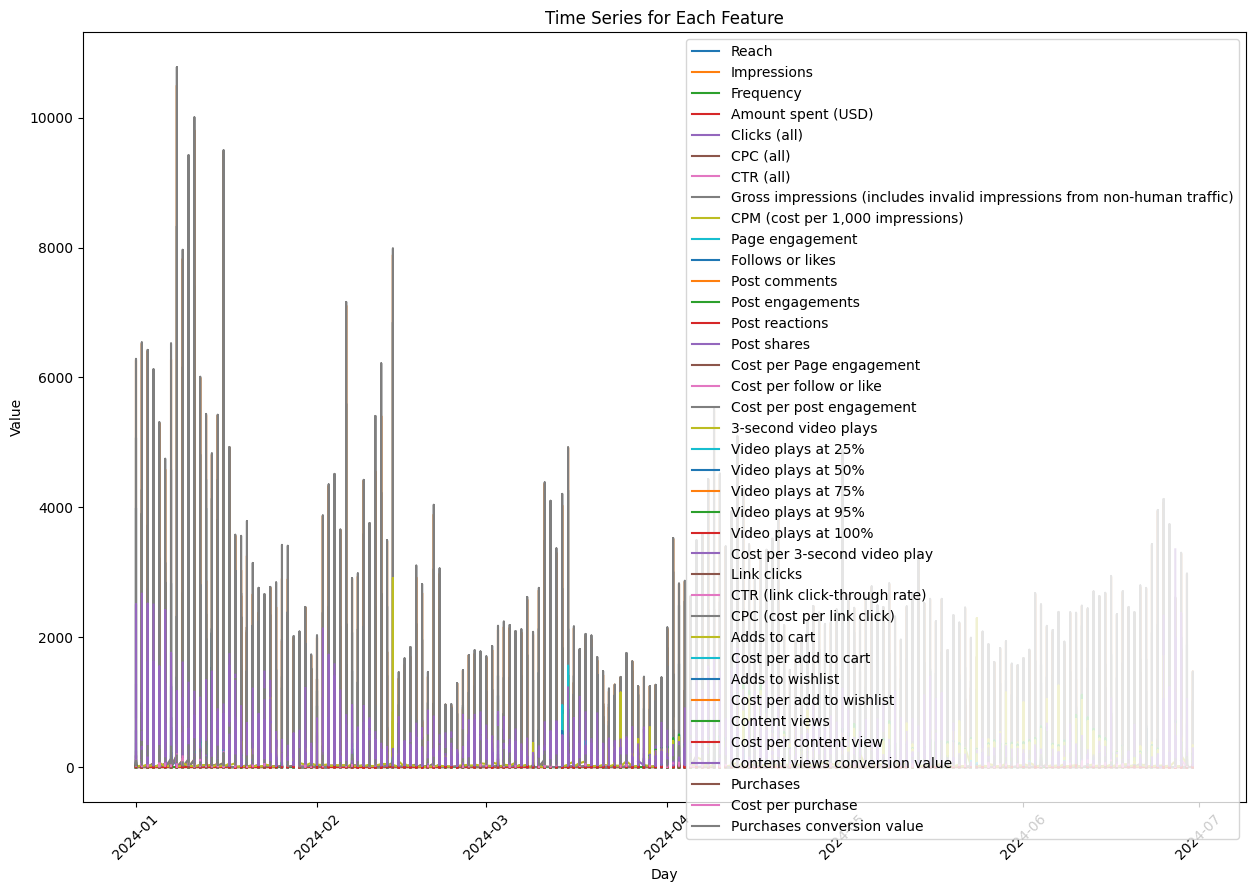

In [13]:
# Convert the 'Day' column to datetime
data['Day'] = pd.to_datetime(data['Day'])

# Get the list of numeric features excluding 'Day'
numeric_features = data.select_dtypes(include=['float64', 'int64']).columns

# Set the figure size
plt.figure(figsize=(15, 10))

# Iterate over each numeric feature and plot the time series
for feature in numeric_features:
    plt.plot(data['Day'], data[feature], label=feature, linestyle='-', marker='')

# Set the x-axis label and rotate the tick labels
plt.xlabel('Day')
plt.xticks(rotation=45)

# Set the y-axis label
plt.ylabel('Value')

# Set the title of the plot
plt.title('Time Series for Each Feature')

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.show()

Made changes.